## 1. 查看内存占用

In [4]:
# 1. 当前程序占用内存
import psutil

print(psutil.Process(os.getpid()).memory_info().rss/1024/1024)  # in MB

109.25390625


In [6]:
# 2. dataframe占用内存
import pandas as pd
import sys

df = pd.DataFrame()
sys.getsizeof(df)/1024/1024   # in MB

1.52587890625e-05

In [13]:
# 3. np.array 占用内存
import numpy as np
arr = np.zeros(4)
sys.getsizeof(arr)/1024/1024  # in MB

0.00012969970703125

In [18]:
# 4. GPU剩余显存
import subprocess as sp
import os

def get_gpu_memory():
    _output_to_list = lambda x: x.decode('ascii').split('\n')[:-1]

    ACCEPTABLE_AVAILABLE_MEMORY = 1024
    COMMAND = "nvidia-smi --query-gpu=memory.free --format=csv"
    memory_free_info = _output_to_list(sp.check_output(COMMAND.split()))[1:]
    memory_free_values = [int(x.split()[0]) for i, x in enumerate(memory_free_info)]
    return memory_free_values
memory_free_values = get_gpu_memory()  # in MB
memory_free_values

[236]

## 2. 优化内存占用
### 1) 选取合适的数据类型
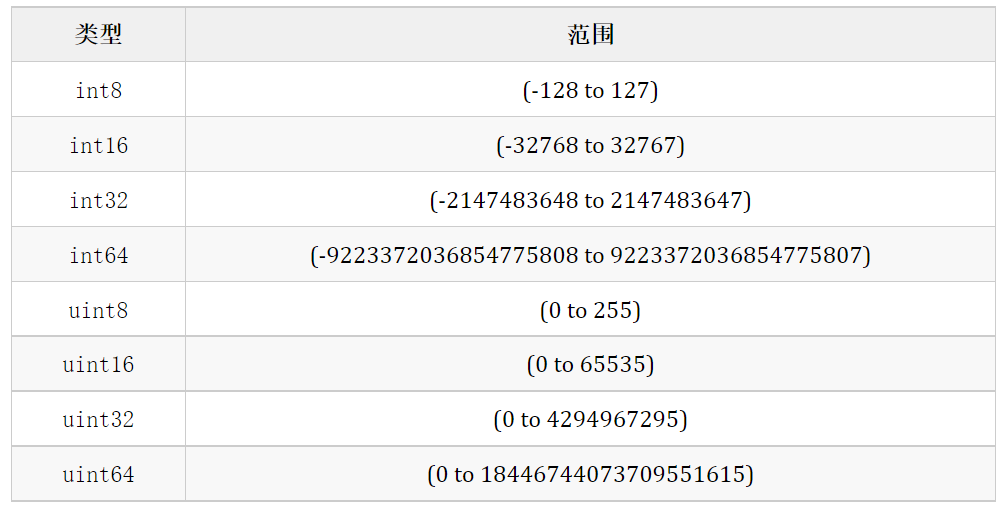

### 2) 对于稀疏数据，选用稀疏矩阵(numpy)

In [24]:
import sparse
arr = np.random.random((1024, 1024))
arr[arr < 0.9] = 0
sparse_arr = sparse.COO(arr)

print(arr.nbytes, sparse_arr.nbytes)

8388608 2512368


### 3) DataFrame 读取时优化

In [ ]:
# 1) 分批处理
df = pd.read_csv(path, chunksize=1000000)
for chunk in df:  
    # 分批次处理数据
    pass

# 2) 读取部分列
df = pd.read_csv(path, usecols=["a"])

# 3) 提前设置列类型
df = pd.read_csv(path, dtype={"a":"int8"})

# 4) 将列别类设置为category
df['a'] = df['a'].astype('category')

# 5) 自动处理
# https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/discussion/56105